<a href="https://colab.research.google.com/github/LIZKA30/ML_2025_autumn/blob/main/homework-practice-02_part_1_2/Lab2-1.%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0.%D0%95%D0%BB%D0%B8%D0%B7%D0%B0%D0%B2%D0%B5%D1%82%D0%B0.%D0%9D%D0%9F%D0%9C%D0%B1%D0%B4-01-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Форма массива: (197, 350, 3)


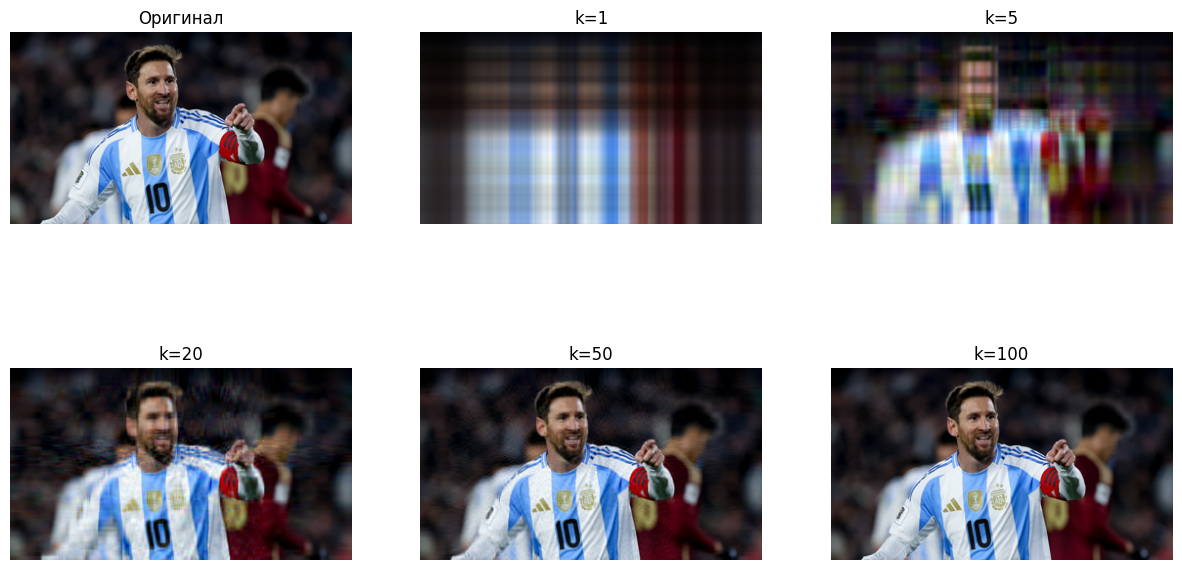

Оригинал: 96568 байт
После SVD-сжатия: 109242 байт


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

img = Image.open("месси.jpg")
w, h = img.size
img = img.resize((w//4, h//4))
x = np.array(img, dtype=np.float32)

print("Форма массива:", x.shape)

def svd_compress_channel(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))

def svd_compress_image(img_array, k):
    channels = []
    for i in range(3):  # R, G, B
        compressed = svd_compress_channel(img_array[:, :, i], k)
        channels.append(compressed)
    compressed_img = np.stack(channels, axis=2)
    compressed_img = np.clip(compressed_img, 0, 255)
    return compressed_img.astype(np.uint8)

ks = [1, 5, 20, 50, 100]

plt.figure(figsize=(15, 8))
plt.subplot(2, len(ks)//2 + 1, 1)
plt.imshow(img)
plt.title("Оригинал")
plt.axis("off")

for i, k in enumerate(ks, start=2):
    comp = svd_compress_image(x, k)
    plt.subplot(2, len(ks)//2 + 1, i)
    plt.imshow(comp)
    plt.title(f"k={k}")
    plt.axis("off")

plt.show()

img.save("original.png")
Image.fromarray(svd_compress_image(x, 50)).save("compressed.png")

size_original = os.path.getsize("original.png")
size_compressed = os.path.getsize("compressed.png")

print(f"Оригинал: {size_original} байт")
print(f"После SVD-сжатия: {size_compressed} байт")